In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import keras

from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape , y_train.shape ,x_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

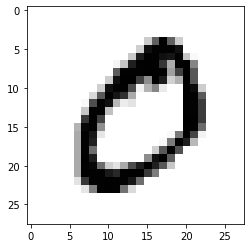

In [ ]:
plt.imshow(x_train[1], cmap = 'binary')


In [ ]:
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test, -1)

In [ ]:
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)


In [ ]:
y_train.shape , y_test.shape

((60000, 10), (10000, 10))

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [ ]:
model = Sequential()

In [ ]:
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=x_train.shape[1:]))#1 convolution layer having 64 filters 3 cross 3 kernels
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))   
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10))   
model.add(Activation("softmax"))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [ ]:
model.compile(loss= keras.losses.categorical_crossentropy, metrics=['accuracy'],optimizer='adam')


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint 

In [ ]:
es= EarlyStopping(monitor='val_acc', min_delta=0.01, patience = 4 , verbose = 1)

mcp = ModelCheckpoint("./bestmodel.h5", monitor='val_acc', verbose=1,save_best_only=True)

cb = [es,mcp]

In [ ]:
his = model.fit(x_train,y_train, epochs =5 , validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 59s 44ms/step - loss: 0.2120 - accuracy: 0.9365 - val_loss: 0.0846 - val_accuracy: 0.9728
Epoch 2/5
1313/1313 [==============================] - 47s 36ms/step - loss: 0.0737 - accuracy: 0.9770 - val_loss: 0.0553 - val_accuracy: 0.9834
Epoch 3/5
1313/1313 [==============================] - 48s 36ms/step - loss: 0.0543 - accuracy: 0.9834 - val_loss: 0.0499 - val_accuracy: 0.9851
Epoch 4/5
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0460 - accuracy: 0.9855 - val_loss: 0.0534 - val_accuracy: 0.9856
Epoch 5/5
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0370 - accuracy: 0.9880 - val_loss: 0.0470 - val_accuracy: 0.9857


In [ ]:
score = model.evaluate(x_test, y_test)

print(f'The Model Accuracy is {score[1]}')

313/313 [==============================] - 3s 11ms/step - loss: 0.0369 - accuracy: 0.9886
The Model Accuracy is 0.9886000156402588
